# Revisiting Blockbuster in 2023

    To create a database for a video rental store chain.

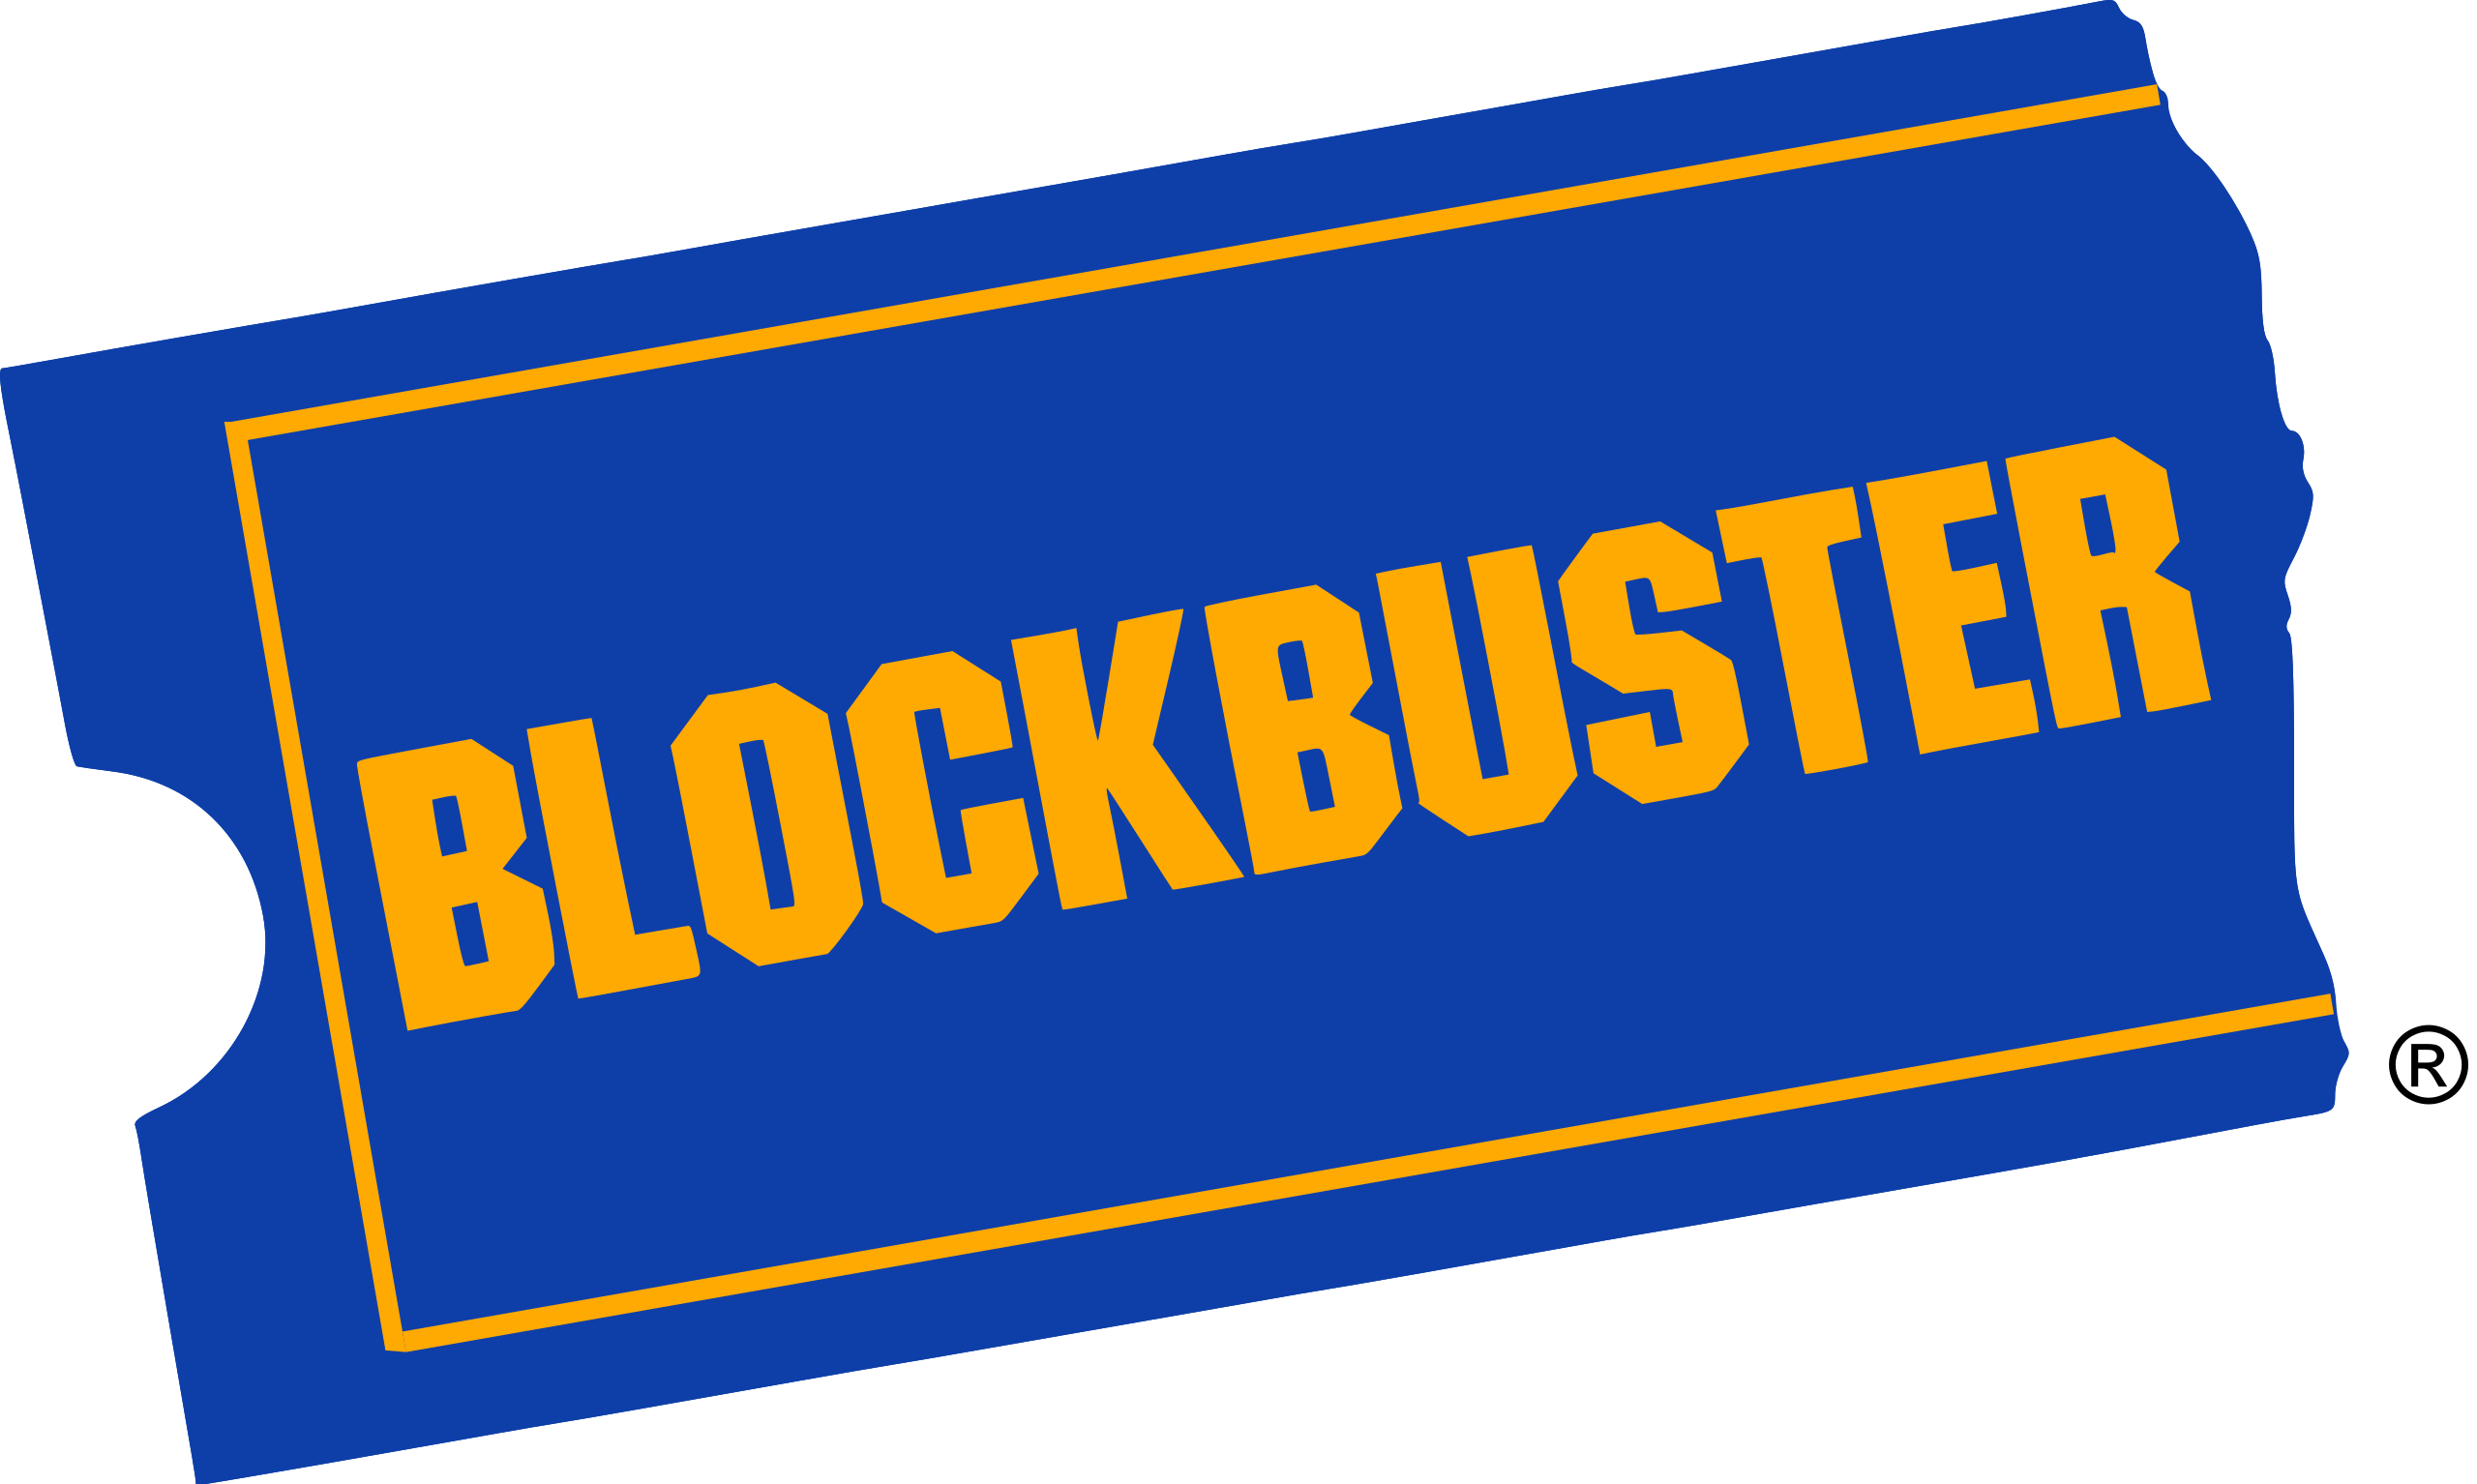

## 01_Data Cleansing:

    actor.csv
    category.csv
    film.csv
    inventory.csv
    language.csv
    old_HDD.csv
    rental.csv

## 02_Coherent tables for SQL:

    actor.csv
    category.csv
    customer.csv
    film.csv
    filmactor.csv
    inventory.csv
    language.csv
    rental.csv
    staff.csv
    store.csv

_____

## 01_Data Cleansing

In [1]:
import re
import random
import zipfile
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import the functions
from src import *

import warnings
warnings.filterwarnings('ignore')

## MODUS OPERANDI 
Data cleansing protocol for each .csv file:

    1. import the data and create the pandas DataFrame:
    raw_df = pd.read_csv('../input/df.csv', encoding = 'latin1')
    df = raw_df.copy()
    df.shape
    df.head(2)
    
    2. remove empty space from column names and cells:
    remove_spaces_column_names(df);
    remove_spaces_columns(df);
    
    3. Find duplicates and remove them if needed:
    any_duplicate(df)
    specific_duplicates(df, col1, col2)
    drop_duplicates(df)

    4. Find NaN values and visualize them.
    nan(df) 
    view_nan(df) 
    
    5. Check the columns that are constant or present low variance:
    low_variance(df) 
    unique_values(df)
    constant_columns(df)
    
    * Evaluate if the constant or low variance columns are needed or can be droped:
    df.drop('column', axis = 1, inplace = True)
    
    6. Find cells containing special characters:
    find_special_chars(df, patron = r'[?¿*$%&]')
    
    7. export the clean table as csv:
    df.to_csv('../output_clean/df.csv', index = False)

## actor.csv

In [2]:
raw_actor = pd.read_csv('../input/actor.csv', encoding = 'latin1')

In [3]:
actor = raw_actor.copy()

In [4]:
actor.shape

(200, 4)

In [5]:
actor.head(2)

,actor_id,first_name,last_name,last_update
0,1,PENELOPE,GUINESS,2006-02-15 04:34:33
1,2,NICK,WAHLBERG,2006-02-15 04:34:33


In [6]:
remove_spaces_column_names(actor);

In [7]:
remove_spaces_columns(actor);

In [8]:
any_duplicate(actor)

False

In [9]:
specific_duplicates(actor, ['first_name', 'last_name'])

,actor_id,first_name,last_name,last_update
100,101,SUSAN,DAVIS,2006-02-15 04:34:33
109,110,SUSAN,DAVIS,2006-02-15 04:34:33


In [10]:
actor.drop(actor.index[109], inplace = True);

In [11]:
actor.loc[actor['last_name'].str.contains('DAVIS')]

,actor_id,first_name,last_name,last_update
3,4,JENNIFER,DAVIS,2006-02-15 04:34:33
100,101,SUSAN,DAVIS,2006-02-15 04:34:33


In [12]:
nan(actor)

actor_id       0
first_name     0
last_name      0
last_update    0
dtype: int64

In [13]:
low_variance(actor)

[]

In [14]:
unique_values(actor)

[('last_update', 1),
 ('last_name', 121),
 ('first_name', 128),
 ('actor_id', 199)]

In [15]:
constant_columns(actor)

([], ['last_update'])

In [16]:
actor.drop('last_update', axis = 1, inplace = True)

In [17]:
find_special_chars(actor, patron = r'[?¿*$%&]')

In [18]:
actor.to_csv('../output_clean/actor.csv', index = False)

____

## category.csv

In [19]:
raw_category = pd.read_csv('../input/category.csv', encoding = 'latin1')

In [20]:
category = raw_category.copy()

In [21]:
category.shape

(16, 3)

In [22]:
category.head(2)

,category_id,name,last_update
0,1,Action,2006-02-15 04:46:27
1,2,Animation,2006-02-15 04:46:27


In [23]:
remove_spaces_column_names(category);

In [24]:
remove_spaces_columns(category);

In [25]:
any_duplicate(category)

False

In [26]:
nan(category)

category_id    0
name           0
last_update    0
dtype: int64

In [27]:
low_variance(category)

[]

In [28]:
unique_values(category)

[('last_update', 1), ('category_id', 16), ('name', 16)]

In [29]:
constant_columns(category)

([], ['last_update'])

In [30]:
category.drop('last_update', axis = 1, inplace = True)

In [31]:
find_special_chars(category, patron = r'[?¿*$%&]')

In [32]:
category.to_csv('../output_clean/category.csv', index = False)

____

## film.csv

In [33]:
raw_film = pd.read_csv('../input/film.csv', encoding = 'latin1')

In [34]:
film = raw_film.copy()

In [35]:
film.shape

(1000, 13)

In [36]:
film.head(2)

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,NaN,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,NaN,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2006-02-15 05:03:42


In [37]:
remove_spaces_column_names(film);

In [38]:
remove_spaces_columns(film);

In [39]:
any_duplicate(film) 

False

In [40]:
nan(film) 

original_language_id    1000
film_id                    0
title                      0
description                0
release_year               0
language_id                0
rental_duration            0
rental_rate                0
length                     0
replacement_cost           0
rating                     0
special_features           0
last_update                0
dtype: int64

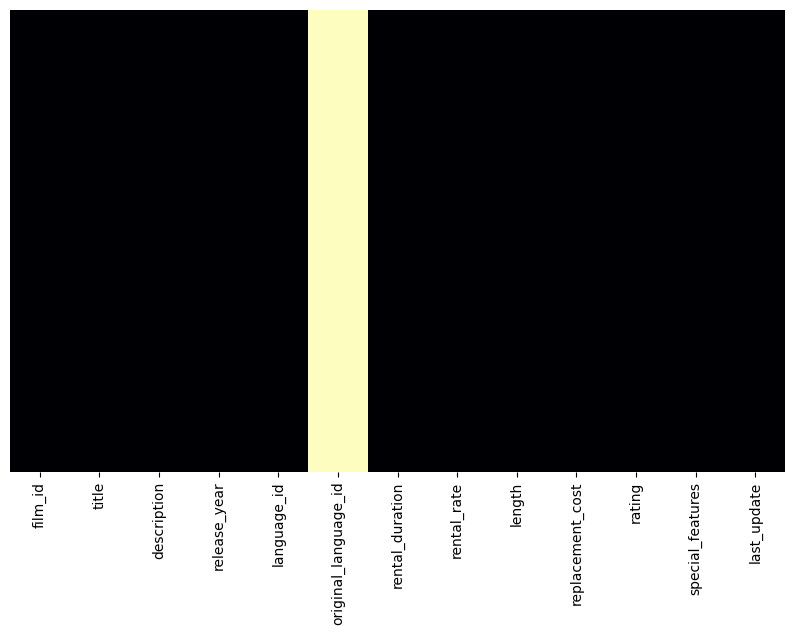

In [41]:
view_nan(film) 

    Because there are only two languages in 'language.csv'
    I will search for words containing 'ita' in the description.

In [42]:
film.loc[film['description'].str.contains('ita')].index

Int64Index([], dtype='int64')

    Because there are no cells including 'ita' in the description,
    I will use English as the original language for all the films in the list.
    the language_id for english is 1

In [43]:
film['original_language_id'].fillna(1, inplace = True)

In [44]:
nan(film) 

film_id                 0
title                   0
description             0
release_year            0
language_id             0
original_language_id    0
rental_duration         0
rental_rate             0
length                  0
replacement_cost        0
rating                  0
special_features        0
last_update             0
dtype: int64

In [45]:
low_variance(film) 

['release_year', 'language_id', 'original_language_id']

In [46]:
unique_values(film)

[('release_year', 1),
 ('language_id', 1),
 ('original_language_id', 1),
 ('last_update', 1),
 ('rental_rate', 3),
 ('rental_duration', 5),
 ('rating', 5),
 ('special_features', 15),
 ('replacement_cost', 21),
 ('length', 140),
 ('film_id', 1000),
 ('title', 1000),
 ('description', 1000)]

In [47]:
film['release_year'].value_counts()

2006    1000
Name: release_year, dtype: int64

In [48]:
film['language_id'].value_counts()

1    1000
Name: language_id, dtype: int64

In [49]:
constant_columns(film)

(['release_year', 'language_id', 'original_language_id'], ['last_update'])

In [50]:
film.drop('last_update', axis = 1, inplace = True)

In [51]:
film.drop('original_language_id', axis = 1, inplace = True)

In [52]:
find_special_chars(film, patron = r'[?¿*$%&]') 

In [53]:
film.head(2)

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes"
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,3,4.99,48,12.99,G,"Trailers,Deleted Scenes"


In [54]:
film.to_csv('../output_clean/film.csv', index = False)

## inventory.csv

In [55]:
raw_inventory = pd.read_csv('../input/inventory.csv', encoding = 'latin1')

In [56]:
inventory = raw_inventory.copy()

In [57]:
inventory.shape

(1000, 4)

In [58]:
inventory.head(2)

,inventory_id,film_id,store_id,last_update
0,1,1,1,2006-02-15 05:09:17
1,2,1,1,2006-02-15 05:09:17


In [59]:
remove_spaces_column_names(inventory);

In [60]:
remove_spaces_columns(inventory);

In [61]:
any_duplicate(inventory) 

False

In [62]:
nan(inventory) 

inventory_id    0
film_id         0
store_id        0
last_update     0
dtype: int64

In [63]:
low_variance(inventory) 

[]

In [64]:
unique_values(inventory)

[('last_update', 1), ('store_id', 2), ('film_id', 207), ('inventory_id', 1000)]

In [65]:
constant_columns(inventory)

([], ['last_update'])

    I will maintain this column here, because I think that the inventory will need to be updated frequently.

In [66]:
find_special_chars(inventory, patron = r'[?¿*$%&]') 

In [67]:
inventory.to_csv('../output_clean/inventory.csv', index = False)

## language.csv

In [68]:
raw_language = pd.read_csv('../input/language.csv', encoding = 'latin1')

In [69]:
language = raw_language.copy()

In [70]:
language.shape

(6, 3)

In [71]:
language.head(2)

,language_id,name,last_update
0,1,English,2006-02-15 05:02:19
1,2,Italian,2006-02-15 05:02:19


In [72]:
remove_spaces_column_names(language);

In [73]:
remove_spaces_columns(language);

In [74]:
any_duplicate(language) 

False

In [75]:
nan(language) 

language_id    0
name           0
last_update    0
dtype: int64

In [76]:
low_variance(language) 

[]

In [77]:
unique_values(language)

[('last_update', 1), ('language_id', 6), ('name', 6)]

In [78]:
constant_columns(language)

([], ['last_update'])

In [79]:
language.drop('last_update', axis = 1, inplace = True)

In [80]:
find_special_chars(language, patron = r'[?¿*$%&]') 

In [81]:
language.to_csv('../output_clean/language.csv', index = False)

## old_HDD.csv

In [82]:
raw_old_HDD = pd.read_csv('../input/old_HDD.csv', encoding = 'latin1')

In [83]:
old_HDD = raw_old_HDD.copy()

In [84]:
old_HDD.shape

(1000, 5)

In [85]:
old_HDD.head(2)

,first_name,last_name,title,release_year,category_id
0,PENELOPE,GUINESS,ACADEMY DINOSAUR,2006,6
1,PENELOPE,GUINESS,ANACONDA CONFESSIONS,2006,2


In [86]:
remove_spaces_column_names(old_HDD);

In [87]:
remove_spaces_columns(old_HDD);

In [88]:
any_duplicate(old_HDD) 

False

In [89]:
nan(old_HDD) 

first_name      0
last_name       0
title           0
release_year    0
category_id     0
dtype: int64

In [90]:
low_variance(old_HDD) 

['release_year']

In [91]:
unique_values(old_HDD)

[('release_year', 1),
 ('category_id', 16),
 ('last_name', 37),
 ('first_name', 38),
 ('title', 614)]

In [92]:
constant_columns(old_HDD)

(['release_year'], [])

In [93]:
find_special_chars(old_HDD, patron = r'[?¿*$%&]') 

In [94]:
old_HDD.to_csv('../output_clean/old_HDD.csv', index = False)

## rental.csv

In [95]:
raw_rental = pd.read_csv('../input/rental.csv', encoding = 'latin1')

In [96]:
rental = raw_rental.copy()

In [97]:
rental.shape

(1000, 7)

In [98]:
rental.head(2)

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1,2006-02-15 21:30:53
1,2,2005-05-24 22:54:33,1525,459,2005-05-28 19:40:33,1,2006-02-15 21:30:53


In [99]:
remove_spaces_column_names(rental);

In [100]:
remove_spaces_columns(rental);

In [101]:
any_duplicate(rental) 

False

In [102]:
nan(rental) 

rental_id       0
rental_date     0
inventory_id    0
customer_id     0
return_date     0
staff_id        0
last_update     0
dtype: int64

In [103]:
low_variance(rental) 

[]

In [104]:
constant_columns(rental)

([], ['last_update'])

    I will maintain this column here, because I think that the rental will need to be updated frequently.

In [105]:
find_special_chars(rental, patron = r'[?¿*$%&]') 

In [106]:
rental.to_csv('../output_clean/rental.csv', index = False)

____

## 02_Coherent tables for SQL

    The plan is to create with Python the tables that will follow the next Scheme.
    Then, save the files as '.csv' and finally export the documents to 'MySQL Workbench'.

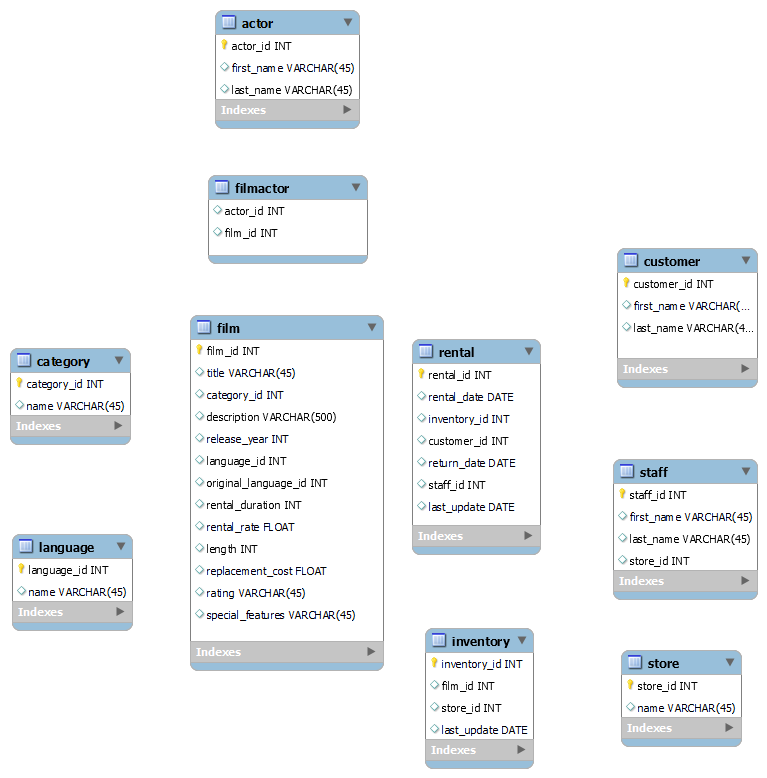

In [107]:
actor.head(2)

,actor_id,first_name,last_name
0,1,PENELOPE,GUINESS
1,2,NICK,WAHLBERG


In [108]:
language.head(2)

,language_id,name
0,1,English
1,2,Italian


In [109]:
actor.to_csv('../output/actor.csv', index = False)
language.to_csv('../output/language.csv', index = False)

## Create an unknown id for'category'

In [110]:
category.loc[16] = ['17', 'unknown']
category.tail(2)

,category_id,name
15,16,Travel
16,17,unknown


In [111]:
category.to_csv('../output/category.csv', index = False)

## Create 'store'

    Store creation to bring realism to the project

In [112]:
data = {'store_id': [1, 2, 3, 4, 5, 6, 7], 
        'name': ['Carabanchel', 'Hervás', 'Dos Hermanas', 'Valladolid', 'Suances', 'Grao', 'Iruña'],
        'latitude': [40.410930, 40.072700, 37.380000, 41.650000, 43.470000, 41.120000, 42.820000],
        'longitude': [-3.691040, -6.261700, -6.020000, -4.710000, -3.840000, -0.350000, -1.640000]}

store = pd.DataFrame(data = data)

In [113]:
store.head(2)

,store_id,name,latitude,longitude
0,1,Carabanchel,40.41093,-3.69104
1,2,Hervás,40.07270,-6.26170


In [114]:
store.to_csv('../output/store.csv', index = False)

## Create 'staff'

    Staff creation to bring realism to the project

In [115]:
data2 = {'staff_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
         'first_name': ['Alfred', 'Mao', 'Benito', 'Augusto', 'Francisco', 'Pol', 'Saddam', 'Amin', 'Nicolae', 'Muammar'],
         'Last_name': ['Hitler', 'Zedong', 'Mussolini', 'Pinochet', 'Franco', 'Pot', 'Hussein', 'Dada', 'Ceaușescu', 'Gaddafi'],
         'store_ID': [7, 6, 5, 4, 3, 2, 1, 7, 6, 5]}

staff = pd.DataFrame(data = data2)

In [116]:
staff.head(2)

,staff_id,first_name,Last_name,store_ID
0,1,Alfred,Hitler,7
1,2,Mao,Zedong,6


In [117]:
staff.to_csv('../output/staff.csv', index = False)

## Create 'customer'

    Staff creation to bring realism to the project

In [118]:
data3 = {'customer_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
         'first_name': ['Janis', 'Stevie', 'Patti', 'Nina', 'Joan', 'Amy', 'Bjork', 'Beyoncé', 'Lzzy', 'Taylor'],
         'last_name': ['Joplin', 'Nicks', 'Smith', 'Simone', 'Jett', 'Winehouse', 'Guðmundsdóttir', 'Knowles', 'Hale', 'Momsen']}

customer = pd.DataFrame(data = data3)

In [119]:
customer.head(2)

,customer_id,first_name,last_name
0,1,Janis,Joplin
1,2,Stevie,Nicks


In [120]:
customer.to_csv('../output/customer.csv', index = False)

## Create 'filmactor'

    From the 'old_HDD' dataframe create the 'filmactor' table.
    Just two columns: film_id and actor_id

In [121]:
old_HDD.head(2)

,first_name,last_name,title,release_year,category_id
0,PENELOPE,GUINESS,ACADEMY DINOSAUR,2006,6
1,PENELOPE,GUINESS,ANACONDA CONFESSIONS,2006,2


In [122]:
data4 = {'film_id': [],
         'actor_id': []}

filmactor = pd.DataFrame(data = data4)

In [123]:
filmactor['actor_id'] = old_HDD['first_name'] + old_HDD['last_name']
filmactor['film_id'] = old_HDD['title']

In [124]:
filmactor.head(2)

,film_id,actor_id
0,ACADEMY DINOSAUR,PENELOPEGUINESS
1,ANACONDA CONFESSIONS,PENELOPEGUINESS


In [125]:
actor_dict = dict(zip(actor['actor_id'], actor['first_name'] + actor['last_name']))

In [126]:
def actor_id_match(x):
    x = str(x)
    for num, name in actor_dict.items():
        if name in x:
            return num

In [127]:
filmactor['actor_id'] = filmactor['actor_id'].apply(actor_id_match)

In [128]:
filmactor.head(2)

,film_id,actor_id
0,ACADEMY DINOSAUR,1
1,ANACONDA CONFESSIONS,1


In [129]:
film_dict = dict(zip(film['film_id'], film['title']))

In [130]:
def film_id_match(x):
    x = str(x)
    for num, name in film_dict.items():
        if name in x:
            return num

In [131]:
filmactor['film_id'] = filmactor['film_id'].apply(film_id_match)

In [132]:
filmactor.head(2)

,film_id,actor_id
0,1,1
1,23,1


In [133]:
filmactor.to_csv('../output/filmactor.csv', index = False)

## Refresh the 'inventory'

In [134]:
inventory.head(2)

,inventory_id,film_id,store_id,last_update
0,1,1,1,2006-02-15 05:09:17
1,2,1,1,2006-02-15 05:09:17


In [135]:
print(f'We have {len(inventory.film_id.unique())} titles in the inventory from the {max(film.film_id)} of the total films.')

We have 207 titles in the inventory from the 1000 of the total films.


    I will destroy the old inventory and create a new one.

In [136]:
inventory = None

    The new inventory will include a 7000 films distributed in all the stores that we have now.

In [137]:
data5 = {'inventory_id': [i for i in range(1, 7001)],
         'film_id': [random.randint(1, 1000) for i in range(7000)],
         'store_id': [random.randint(1, 7) for i in range(7000)],
         'last_update': datetime.datetime.today()}

inventory = pd.DataFrame(data = data5)

In [138]:
inventory.head(2)

,inventory_id,film_id,store_id,last_update
0,1,24,3,2023-10-29 12:30:17.959246
1,2,421,3,2023-10-29 12:30:17.959246


In [139]:
inventory.to_csv('../output/inventory.csv', index = False)

In [140]:
film.head(2)

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes"
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,3,4.99,48,12.99,G,"Trailers,Deleted Scenes"


## The 'film' table

    Extract the 'category_id' from the old_HDD table

In [141]:
old_HDD.head(2)

,first_name,last_name,title,release_year,category_id
0,PENELOPE,GUINESS,ACADEMY DINOSAUR,2006,6
1,PENELOPE,GUINESS,ANACONDA CONFESSIONS,2006,2


In [142]:
film_cat_dict = dict(zip(old_HDD['title'], old_HDD['category_id']))

In [143]:
def film_category_id(x):
    if x in film_cat_dict:
        return film_cat_dict[x]
    else:
        return 17

In [144]:
film['category_id'] = film['title'].apply(film_category_id)

In [145]:
film.tail(2)

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,category_id
998,999,ZOOLANDER FICTION,A Fateful Reflection of a Waitress And a Boat ...,2006,1,5,2.99,101,28.99,R,"Trailers,Deleted Scenes",17
999,1000,ZORRO ARK,A Intrepid Panorama of a Mad Scientist And a B...,2006,1,3,4.99,50,18.99,NC-17,"Trailers,Commentaries,Behind the Scenes",17


    Change the order of the columns to adapt the model

In [146]:
film.columns

Index(['film_id', 'title', 'description', 'release_year', 'language_id',
       'rental_duration', 'rental_rate', 'length', 'replacement_cost',
       'rating', 'special_features', 'category_id'],
      dtype='object')

In [147]:
film = film[['film_id', 'title', 'category_id', 'description', 'release_year', 'language_id', 
             'rental_duration', 'rental_rate', 'length', 'replacement_cost', 
             'rating', 'special_features', ]]

In [148]:
film.to_csv('../output/film.csv', index = False)

## Restart the 'rental' with the new staff, stores, inventary and customers

In [149]:
rental.head(2)

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1,2006-02-15 21:30:53
1,2,2005-05-24 22:54:33,1525,459,2005-05-28 19:40:33,1,2006-02-15 21:30:53


    Restart the 'rental' with the first three rentals

In [150]:
data6 = {'rental_id': [i for i in range(1, 4)],
         'rental_date': datetime.datetime.today(),
         'inventory_id': [random.randint(1, 7000) for i in range(3)],
         'customer_id': [random.randint(1, 10) for i in range(3)],
         'return_date': None,
         'staff_id': [random.randint(1, 10) for i in range(3)],
         'last_update': datetime.datetime.today()}   
         
rental = pd.DataFrame(data = data6)

In [151]:
rental.head()

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2023-10-29 12:30:18.088047,1986,1,None,2,2023-10-29 12:30:18.088047
1,2,2023-10-29 12:30:18.088047,2051,1,None,1,2023-10-29 12:30:18.088047
2,3,2023-10-29 12:30:18.088047,6367,9,None,5,2023-10-29 12:30:18.088047


In [152]:
rental.to_csv('../output/rental.csv', index = False)